In [2]:
import requests
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 52.52,
    "longitude" : 13.41,
    "hourly": "temperature_2m,precipitation"
}
response = requests.get(url, params=params)
data = response.json()

print (data)

{'latitude': 52.52, 'longitude': 13.419998, 'generationtime_ms': 0.08857250213623047, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 38.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'precipitation': 'mm'}, 'hourly': {'time': ['2025-07-17T00:00', '2025-07-17T01:00', '2025-07-17T02:00', '2025-07-17T03:00', '2025-07-17T04:00', '2025-07-17T05:00', '2025-07-17T06:00', '2025-07-17T07:00', '2025-07-17T08:00', '2025-07-17T09:00', '2025-07-17T10:00', '2025-07-17T11:00', '2025-07-17T12:00', '2025-07-17T13:00', '2025-07-17T14:00', '2025-07-17T15:00', '2025-07-17T16:00', '2025-07-17T17:00', '2025-07-17T18:00', '2025-07-17T19:00', '2025-07-17T20:00', '2025-07-17T21:00', '2025-07-17T22:00', '2025-07-17T23:00', '2025-07-18T00:00', '2025-07-18T01:00', '2025-07-18T02:00', '2025-07-18T03:00', '2025-07-18T04:00', '2025-07-18T05:00', '2025-07-18T06:00', '2025-07-18T07:00', '2025-07-18T08:00', '2025-07-18T09:00', '2025-07-18T10:00', '2025-07-18T11:

In [3]:
import pandas as pd
df = pd.DataFrame(data)
print(df)

                latitude  longitude  generationtime_ms  utc_offset_seconds  \
time               52.52  13.419998           0.088573                   0   
temperature_2m     52.52  13.419998           0.088573                   0   
precipitation      52.52  13.419998           0.088573                   0   

               timezone timezone_abbreviation  elevation hourly_units  \
time                GMT                   GMT       38.0      iso8601   
temperature_2m      GMT                   GMT       38.0           °C   
precipitation       GMT                   GMT       38.0           mm   

                                                           hourly  
time            [2025-07-17T00:00, 2025-07-17T01:00, 2025-07-1...  
temperature_2m  [15.3, 14.7, 14.6, 14.0, 14.0, 14.3, 15.0, 15....  
precipitation   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [4]:
df = df[['hourly']]
print (df)

                                                           hourly
time            [2025-07-17T00:00, 2025-07-17T01:00, 2025-07-1...
temperature_2m  [15.3, 14.7, 14.6, 14.0, 14.0, 14.3, 15.0, 15....
precipitation   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


In [5]:
# Convert to standing (long) format DataFrame
df = pd.DataFrame({
    'time': df['hourly']['time'],
    'temperature_2m': df['hourly']['temperature_2m'],
    'precipitation': df['hourly']['precipitation']
})

# Preview
print(df.head())

               time  temperature_2m  precipitation
0  2025-07-17T00:00            15.3            0.0
1  2025-07-17T01:00            14.7            0.0
2  2025-07-17T02:00            14.6            0.0
3  2025-07-17T03:00            14.0            0.0
4  2025-07-17T04:00            14.0            0.0


In [6]:
# # Convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])
print (df)

                   time  temperature_2m  precipitation
0   2025-07-17 00:00:00            15.3            0.0
1   2025-07-17 01:00:00            14.7            0.0
2   2025-07-17 02:00:00            14.6            0.0
3   2025-07-17 03:00:00            14.0            0.0
4   2025-07-17 04:00:00            14.0            0.0
..                  ...             ...            ...
163 2025-07-23 19:00:00            17.8            0.5
164 2025-07-23 20:00:00            17.5            0.5
165 2025-07-23 21:00:00            17.2            0.5
166 2025-07-23 22:00:00            16.9            0.0
167 2025-07-23 23:00:00            16.6            0.0

[168 rows x 3 columns]


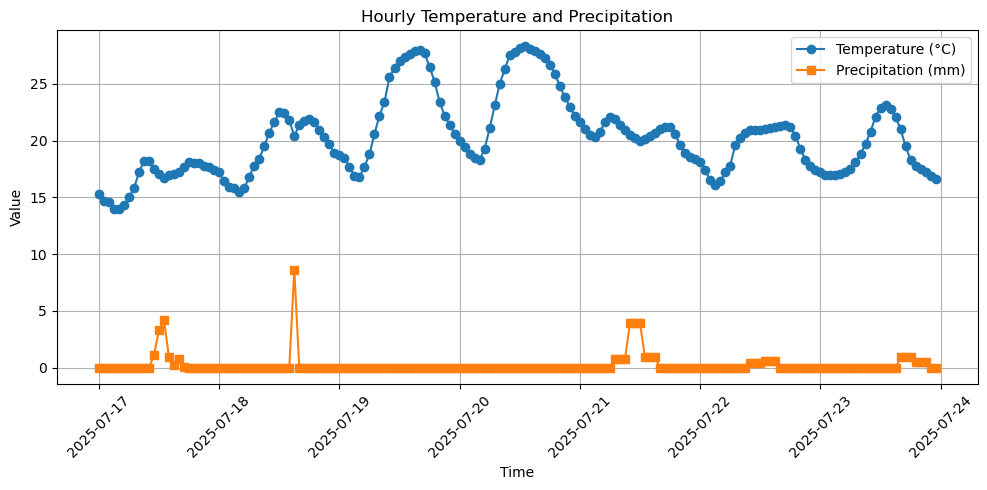

In [7]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['temperature_2m'], marker='o', label='Temperature (°C)')
plt.plot(df['time'], df['precipitation'], marker='s', label='Precipitation (mm)')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Hourly Temperature and Precipitation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

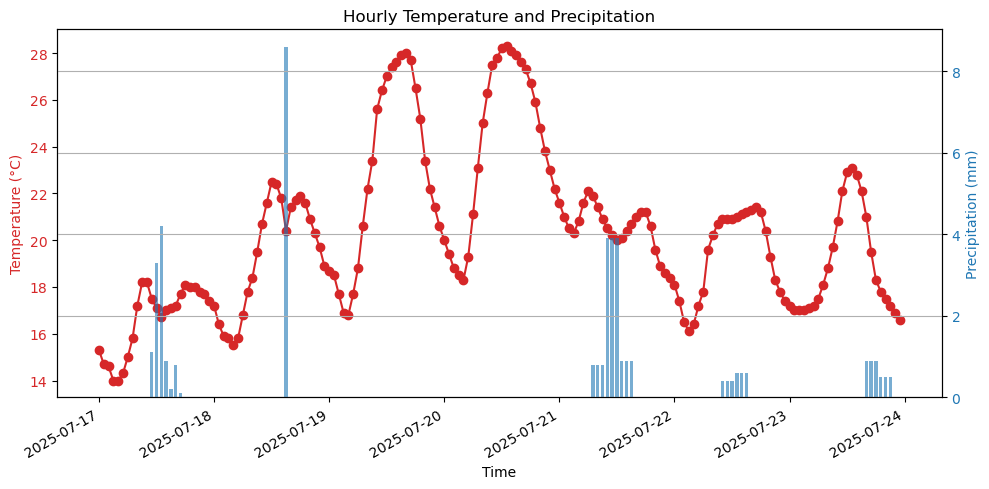

In [8]:
# Plot with secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary axis: Temperature line
ax1.plot(df['time'], df['temperature_2m'], color='tab:red', marker='o', label='Temperature (°C)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Secondary axis: Precipitation bars
ax2 = ax1.twinx()
ax2.bar(df['time'], df['precipitation'], width=0.03, color='tab:blue', alpha=0.6, label='Precipitation (mm)')
ax2.set_ylabel('Precipitation (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Formatting
fig.autofmt_xdate()
plt.title('Hourly Temperature and Precipitation')
fig.tight_layout()
plt.grid(True)
plt.show()